<a href="https://colab.research.google.com/github/newfull5/AI-Project/blob/master/Mnist_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
 
import numpy as np
import sys
import tensorflow as tf

In [0]:
seed = 3
tf.random.set_seed(seed)
np.random.seed(seed)

In [5]:
(X_train, Y_class_train), (X_test, Y_class_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [21]:
X_train.shape

(60000, 784)

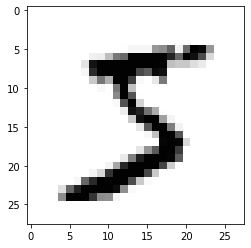

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [7]:
!nvidia-smi

Wed May  6 15:19:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28*28)

In [0]:
X_train = X_train.astype('float64')
X_train = X_train / 255

In [0]:
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [13]:
print("class : %d " % (Y_class_train[0]))

class : 5 


In [22]:
# 클래스 값 확인
print("class : %d " % (Y_class_train[0]))
  
# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
 
print(Y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
import os
from keras.callbacks import ModelCheckpoint,EarlyStopping
 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
 
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [28]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15445, saving model to ./model/01-0.1545.hdf5

Epoch 00002: val_loss improved from 0.15445 to 0.10751, saving model to ./model/02-0.1075.hdf5

Epoch 00003: val_loss improved from 0.10751 to 0.08718, saving model to ./model/03-0.0872.hdf5

Epoch 00004: val_loss improved from 0.08718 to 0.08180, saving model to ./model/04-0.0818.hdf5

Epoch 00005: val_loss improved from 0.08180 to 0.07050, saving model to ./model/05-0.0705.hdf5

Epoch 00006: val_loss did not improve from 0.07050

Epoch 00007: val_loss improved from 0.07050 to 0.06477, saving model to ./model/07-0.0648.hdf5

Epoch 00008: val_loss improved from 0.06477 to 0.06111, saving model to ./model/08-0.0611.hdf5

Epoch 00009: val_loss did not improve from 0.06111

Epoch 00010: val_loss improved from 0.06111 to 0.05861, saving model to ./model/10-0.0586.hdf5

Epoch 00011: val_loss did not improve from 0.05861

Epoch 00012: val_loss did not improve from 0.05861

Epoch 00013: val_loss did n

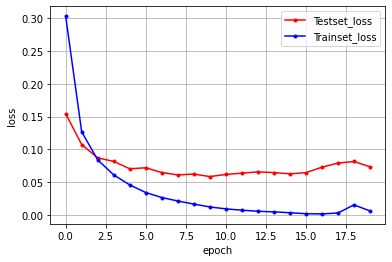

In [29]:
import matplotlib.pyplot as plt
 
y_vloss = history.history['val_loss']
  
# 학습셋의 오차
y_loss = history.history['loss']
  
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
  
# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()